# About Dataset

- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, balanced_accuracy_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder





In [95]:
data = pd.read_csv("data/customer-churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [96]:
data.shape

(10000, 18)

In [97]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [98]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [99]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [101]:
data.isnull().mean()*100

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [91]:
for col in data.columns:
    print(col,"-->",data[col].nunique())
    print()

RowNumber --> 10000

CustomerId --> 10000

Surname --> 2932

CreditScore --> 460

Geography --> 3

Gender --> 2

Age --> 70

Tenure --> 11

Balance --> 6382

NumOfProducts --> 4

HasCrCard --> 2

IsActiveMember --> 2

EstimatedSalary --> 9999

Exited --> 2

Complain --> 2

Satisfaction Score --> 5

Card Type --> 4

Point Earned --> 785



In [21]:
df = data.copy()

In [22]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

The above features aren't useful for us, we are focusing the analysis on variables that are more likely to have a meaningful and statistical impact on predicting customer churn. So we are going to drop those columns.

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [24]:
#df['Exited']= df['Exited'].astype('str')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

# EDA 

In [26]:
cat_columns = df.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = df.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Geography', 'Gender', 'Card Type']

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


#### Numerical Columns

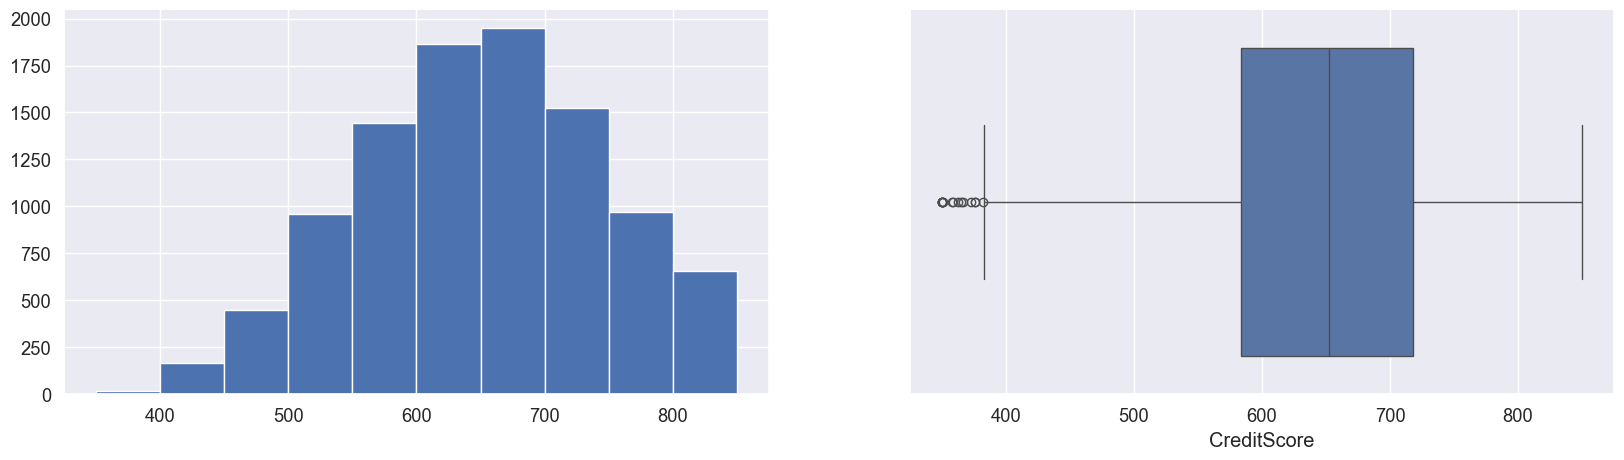

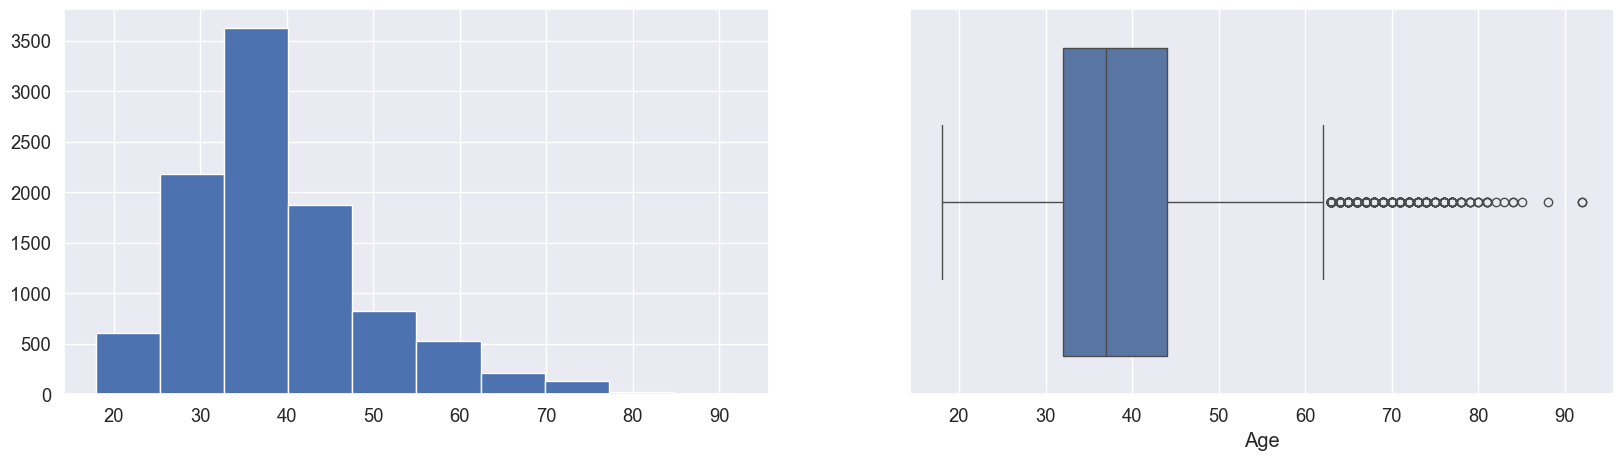

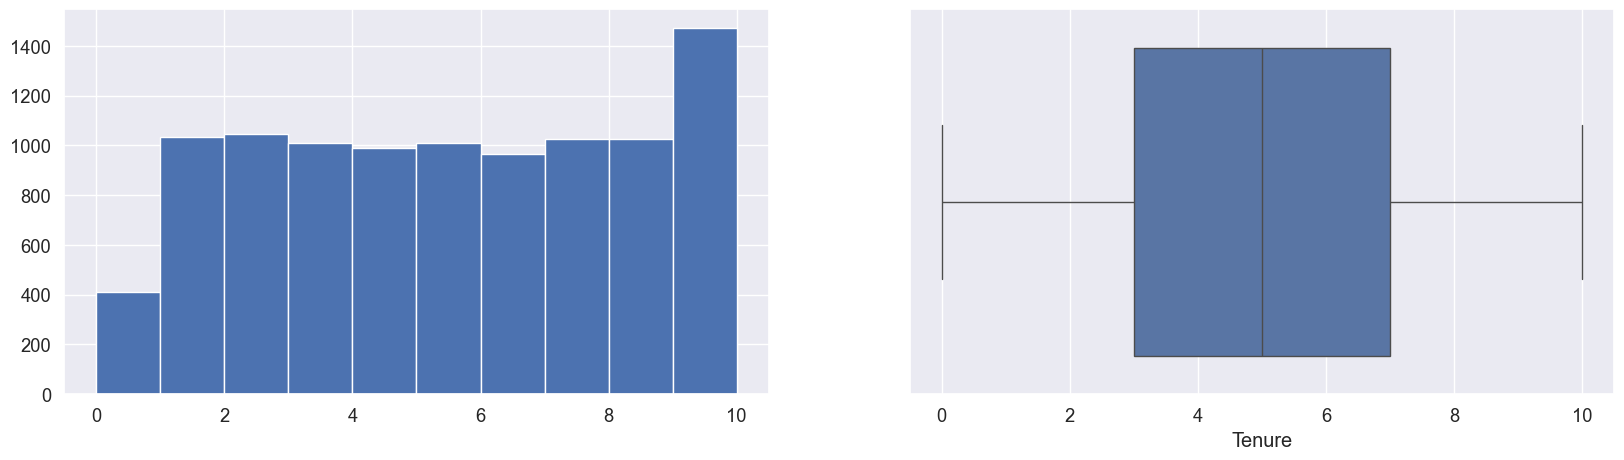

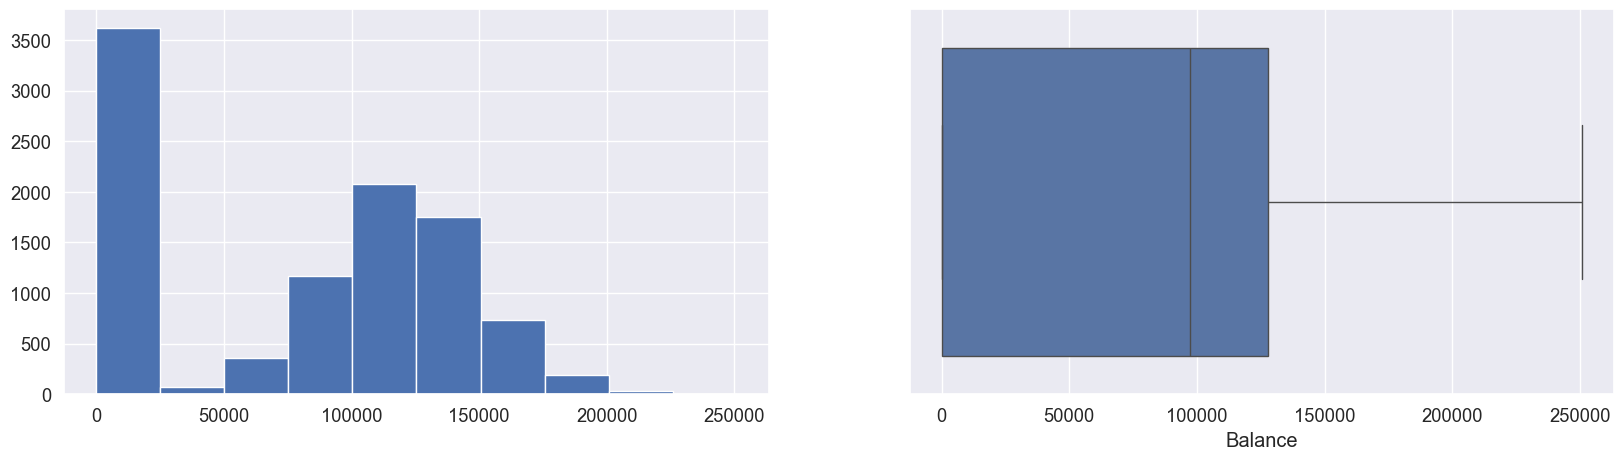

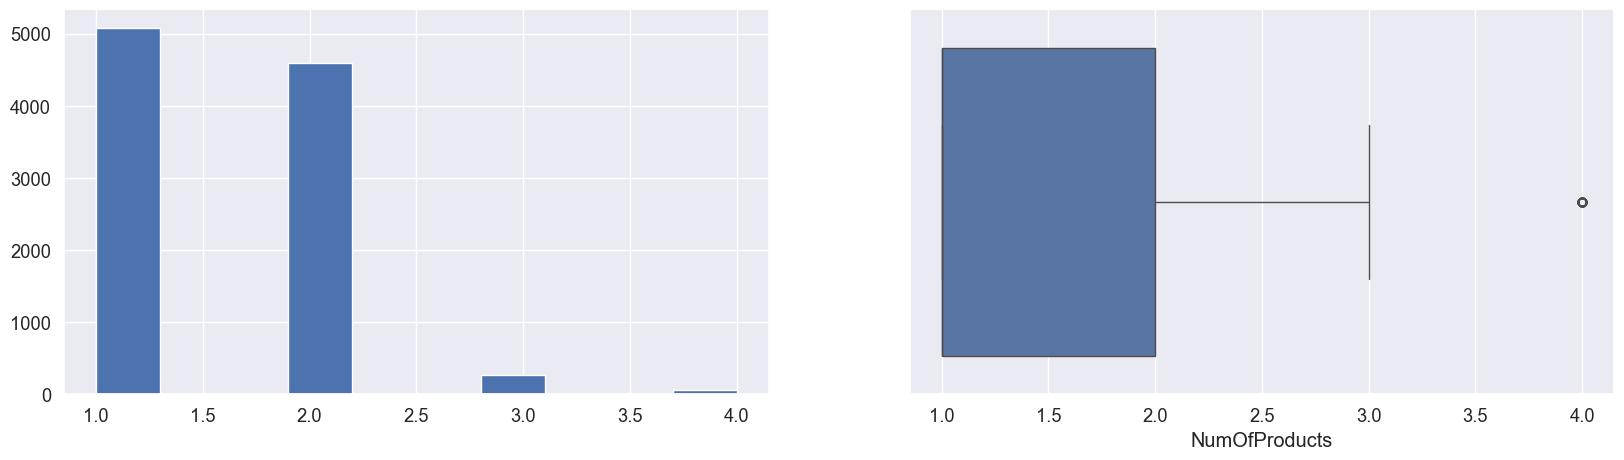

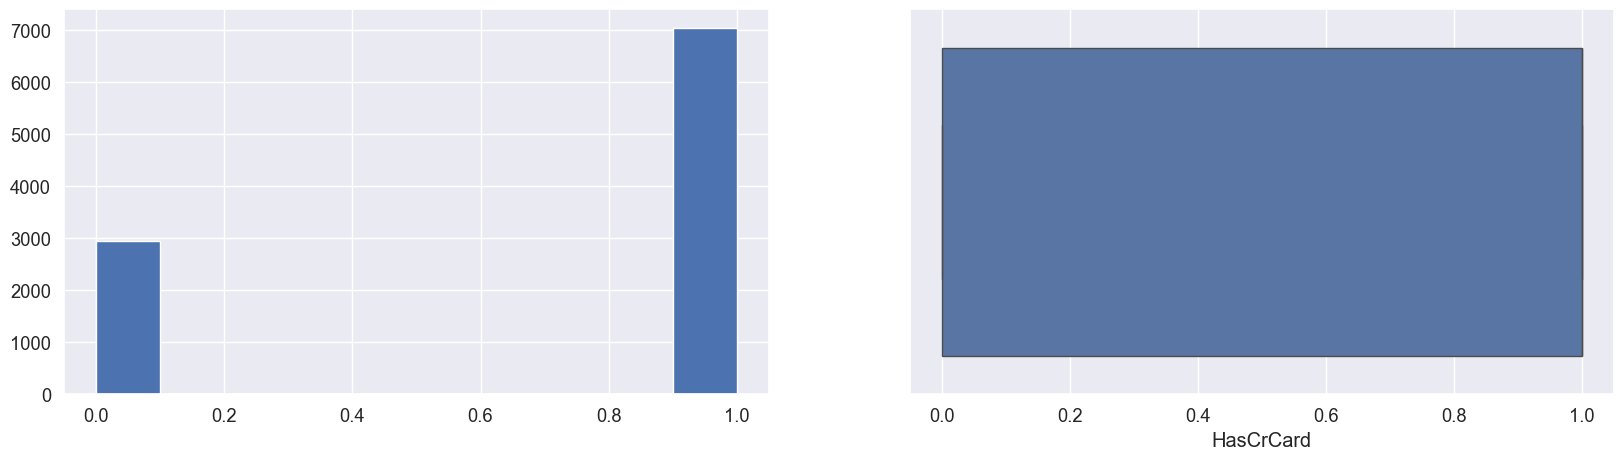

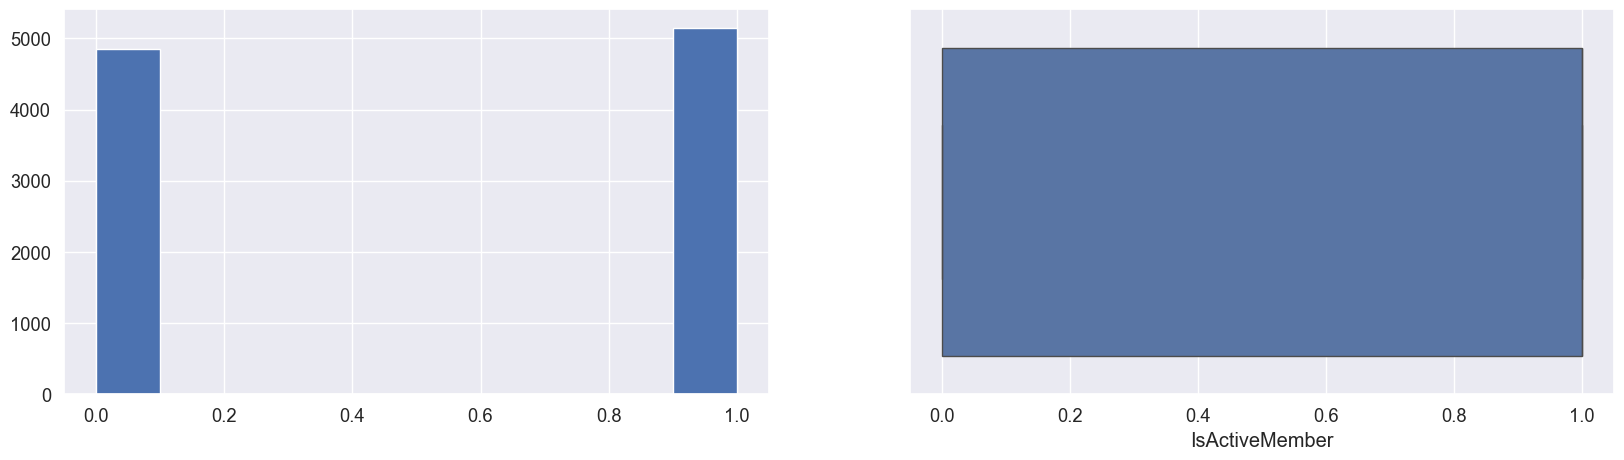

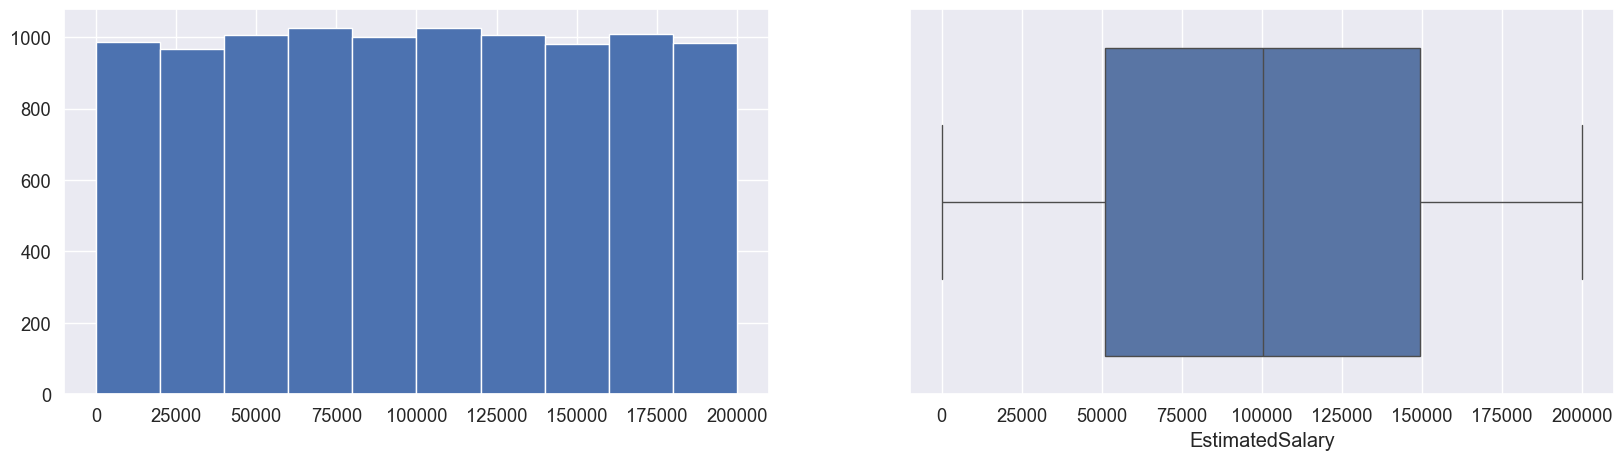

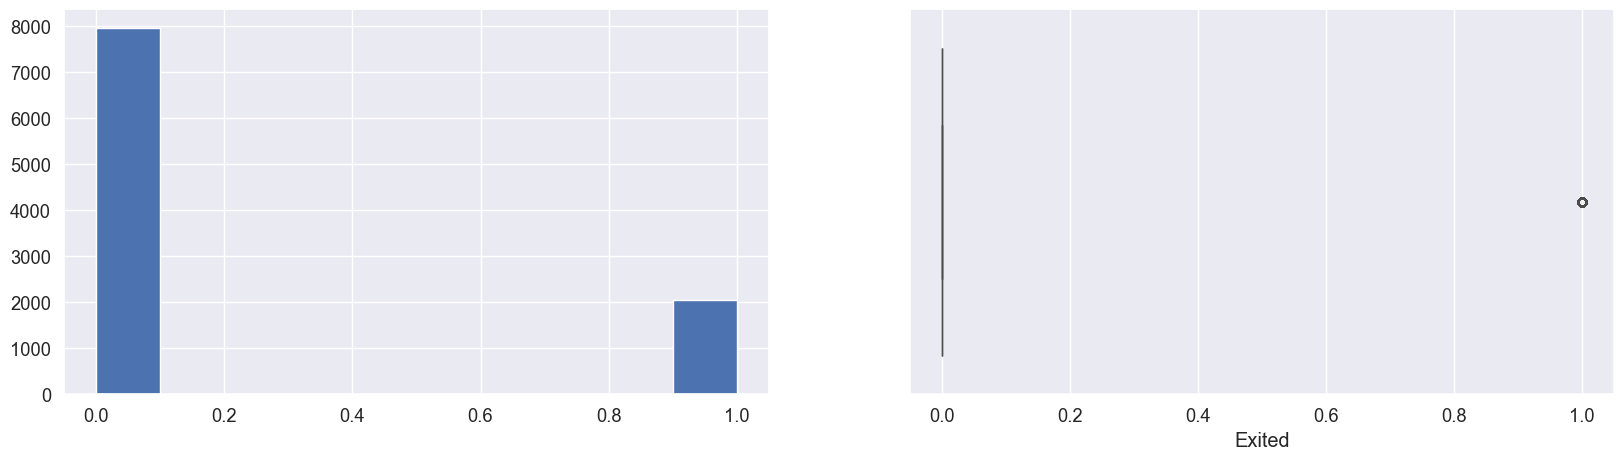

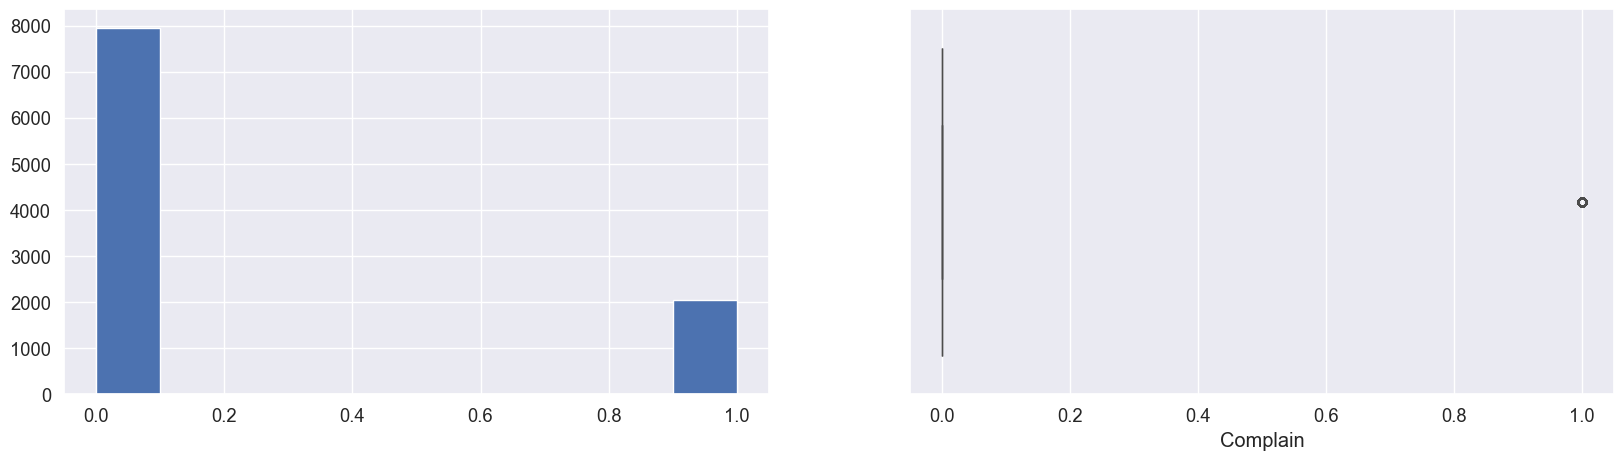

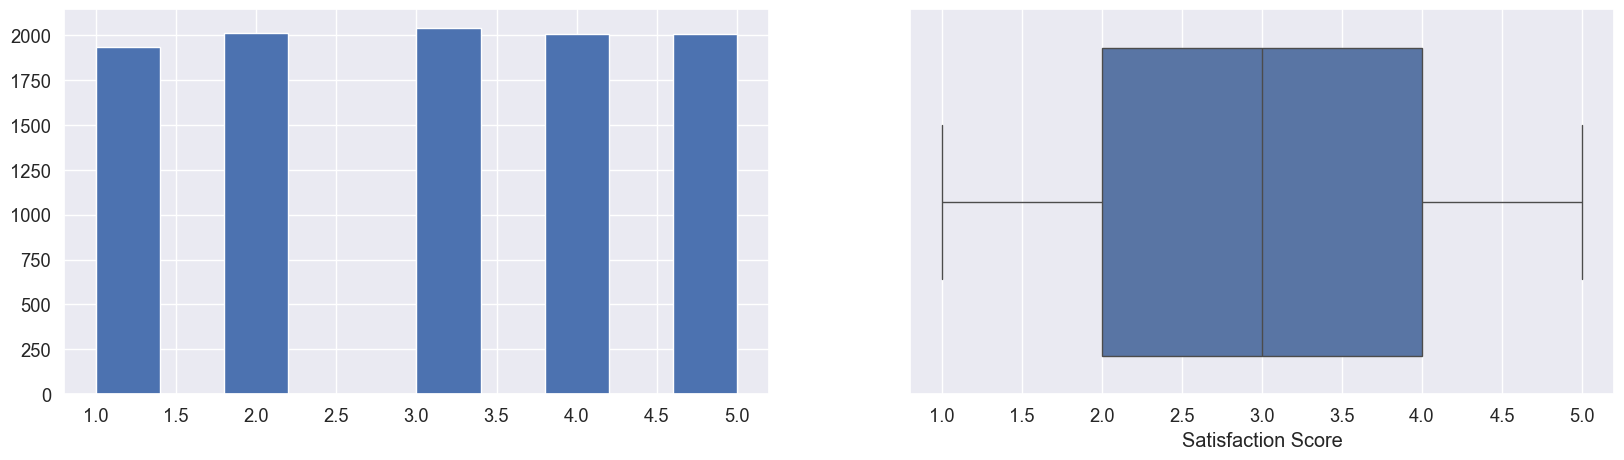

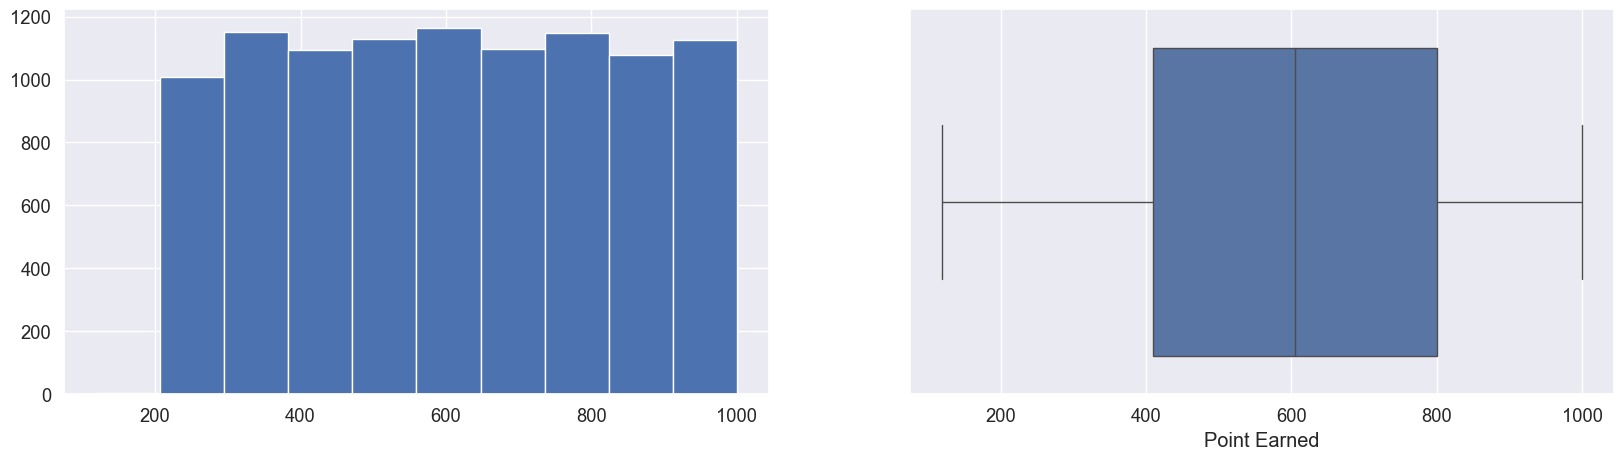

In [27]:
sns.set_context('notebook', font_scale= 1.2)

for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    df[col].hist(ax=ax[0])
    sns.boxplot(x = df[col], ax= ax[1])

# Categorical Columns

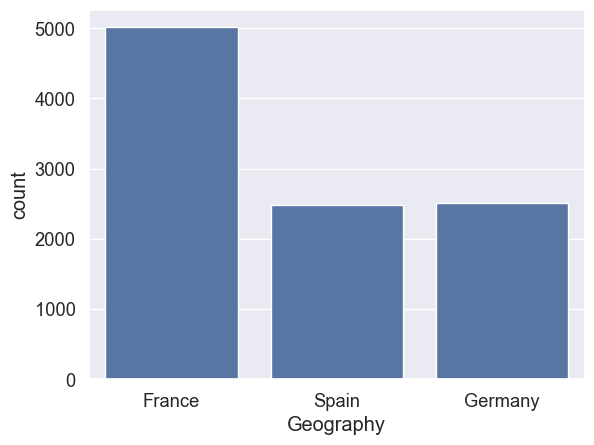

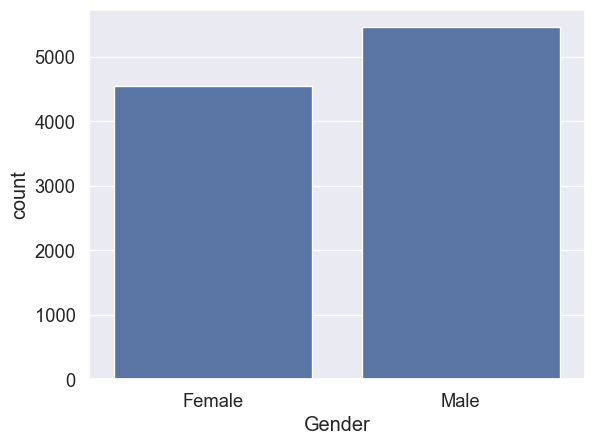

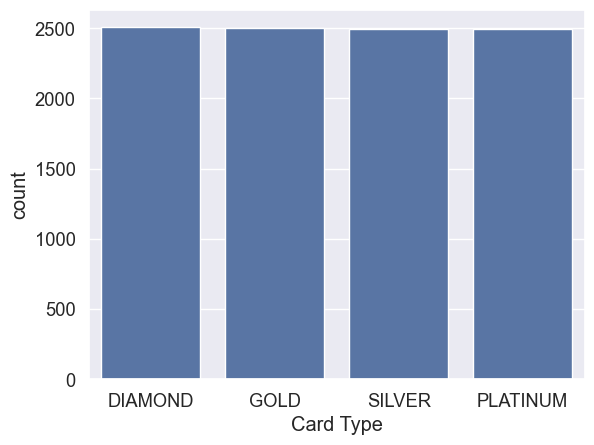

In [28]:
for col in cat_columns:
    sns.countplot(data=df,x=col)
    plt.show()

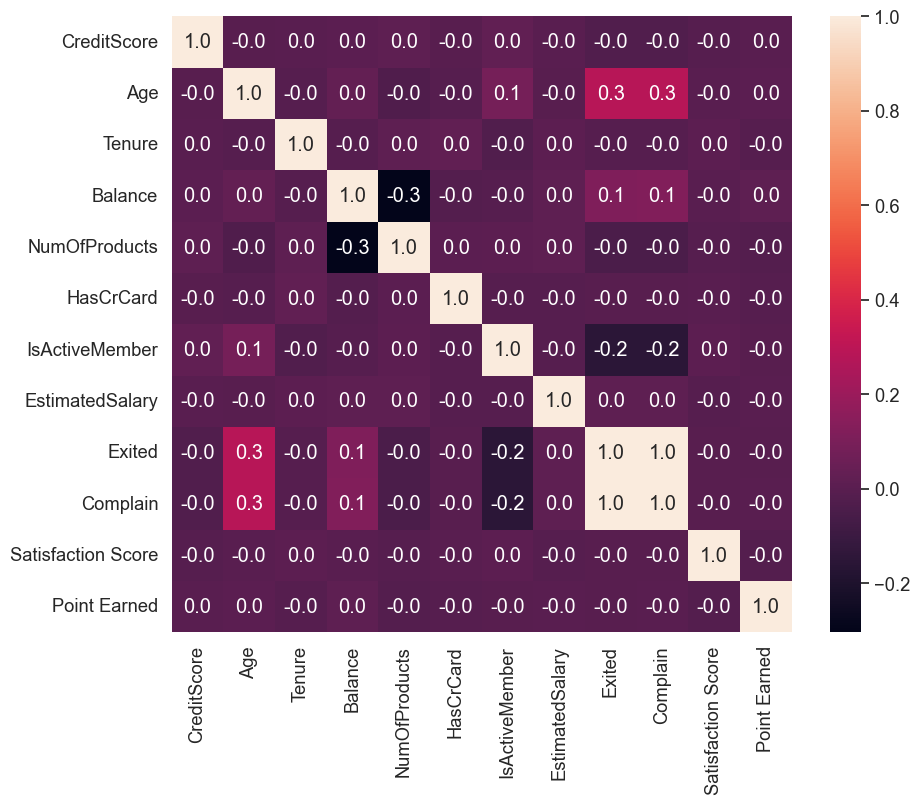

In [29]:
corr_matrix = df[num_columns].corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt='.1f')
plt.show()


In [30]:
df[['HasCrCard', 'IsActiveMember']] = df[['HasCrCard', 'IsActiveMember']].astype('str')

Since HasCrCard, IsActiveMember, Complain are yes/no values, we'll change their type to categorical

In [31]:
test = df.copy()

In [32]:

le = LabelEncoder()

test['HasCrCard'] = le.fit_transform(test['HasCrCard'])
test['IsActiveMember'] = le.fit_transform(test['IsActiveMember'])



In [33]:
test['Gender'] = le.fit_transform(test['Gender'])


In [34]:
test.drop('Complain',axis=1,inplace=True)

In [35]:
test = pd.get_dummies(test, columns=['Card Type', 'Geography'])


In [36]:
X = test.drop('Exited',axis=1)
y = test['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_pred,y_test))
print()
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1855
           1       0.20      0.55      0.30       145

    accuracy                           0.81      2000
   macro avg       0.58      0.69      0.59      2000
weighted avg       0.90      0.81      0.85      2000


[[1542  313]
 [  65   80]]


/var/folders/31/9l9n0p511pq6cwry4x05777c0000gn/T/ipykernel_46236/4149016859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
/var/folders/31/9l9n0p511pq6cwry4x05777c0000gn/T/ipykernel_46236/4149016859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
/var/folders/31/9l9n0p511pq6cwry4x05777c0000gn/T/ipykernel_46236/4149016859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2')
/var/folders/31/9l9n0p511pq6cwry4x05777c0000gn/T/ipykernel_46236

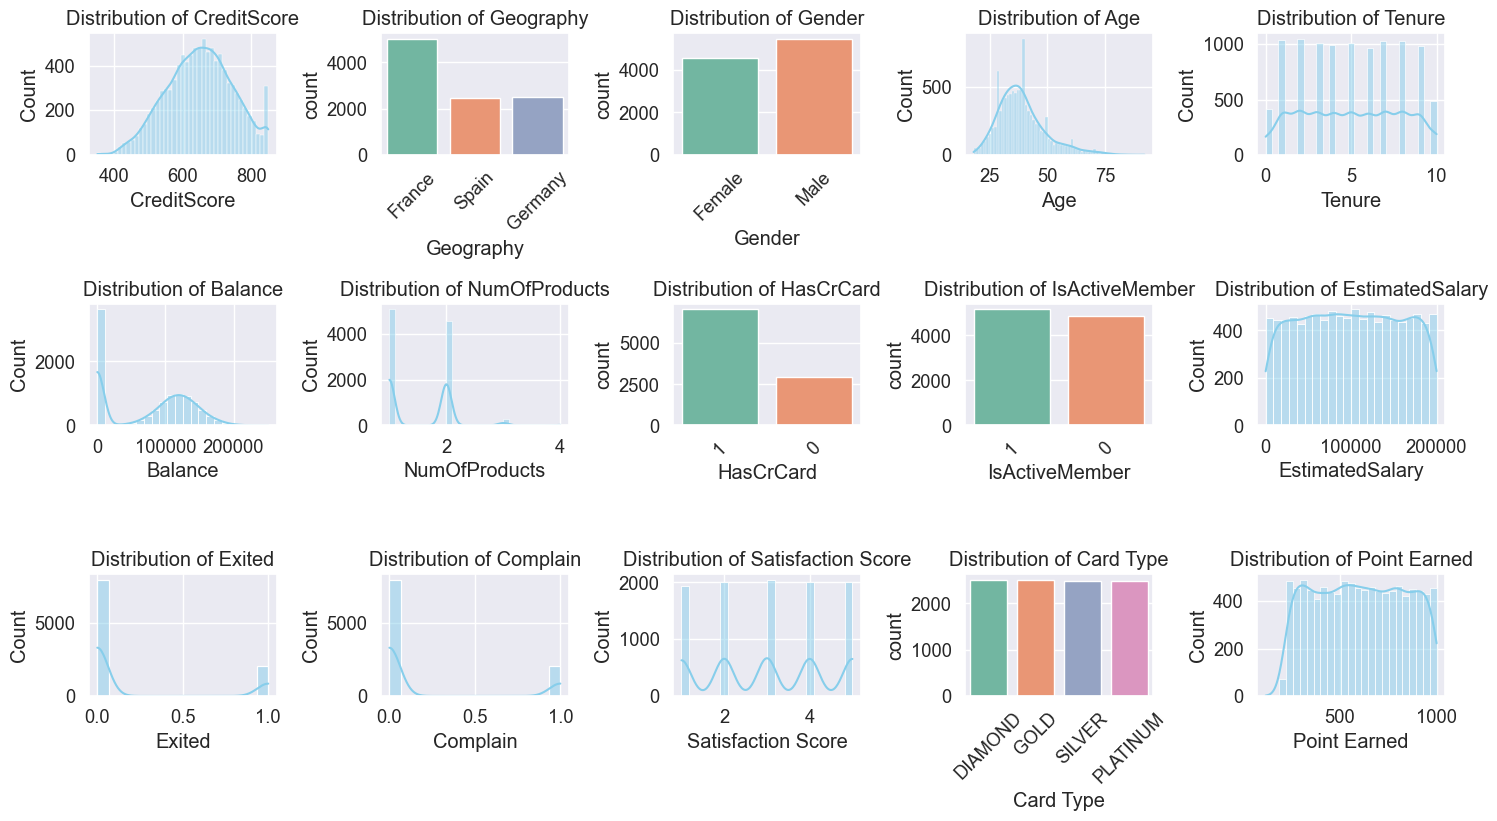

In [37]:


# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Iterate over each column to create a subplot for each feature
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 5, i)  # Adjust the grid size (4x5) based on your number of features
    if df[column].dtype in ['int64', 'float64']:  # If the feature is numerical
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'Distribution of {column}')
    else:  # If the feature is categorical
        sns.countplot(x=df[column], palette='Set2')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  object 
 8   IsActiveMember      10000 non-null  object 
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ 

# Feature Engineering

In [39]:
# Applying one-hot encoding to the 'Card Type', 'Gender', and 'Geography' columns
df = pd.get_dummies(df, columns=['Card Type', 'Gender', 'Geography'])

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,0,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,1,0,0,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,0,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,1,0,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,0,1,0,0,0,1


In [40]:
test = df.copy()
test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,0,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,1,0,0,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,0,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,1,0,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,0,1,0,0,0,1


In [41]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [42]:
X.shape

(10000, 20)

# Logistic Regression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [46]:
print(classification_report(y_pred,y_test))
print()
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


[[1606    1]
 [   1  392]]


##### Data Leakage: we can see that we have an absolute correlation between the Complain variable and our Target variable, with that we exclude the Complain variable so that we can run our models.

In [47]:
test.drop('Complain',axis=1,inplace=True)

In [48]:
X = test.drop('Exited',axis=1)
y = test['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


[[1542   65]
 [ 313   80]]


In [49]:
print(balanced_accuracy_score(y_test,y_pred))

0.5815571505705794


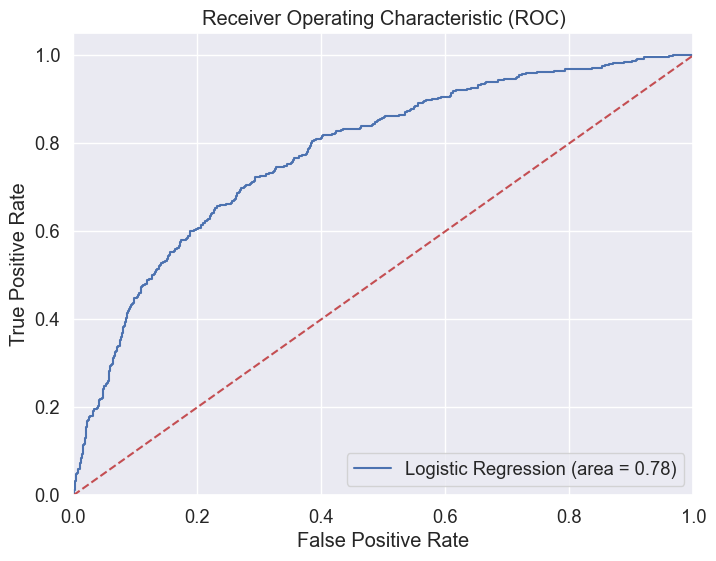

In [50]:
#Predicting probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Generating ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Checking for Imbalance Dataset

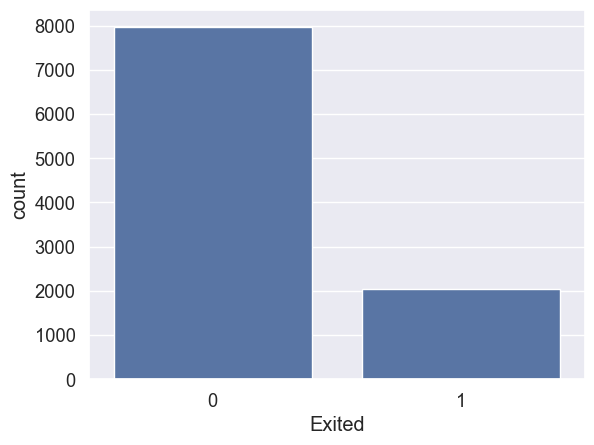

In [51]:
sns.countplot(data=data,x='Exited')
plt.show()

# OverSampling

In [52]:
y_train.value_counts()

0    6355
1    1645
Name: Exited, dtype: int64

In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [54]:
y_train.value_counts()

0    6355
1    6355
Name: Exited, dtype: int64

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.70      0.49       393

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000


[[1158  449]
 [ 117  276]]


In [56]:
print(balanced_accuracy_score(y_test,y_pred))


0.7114437313851137


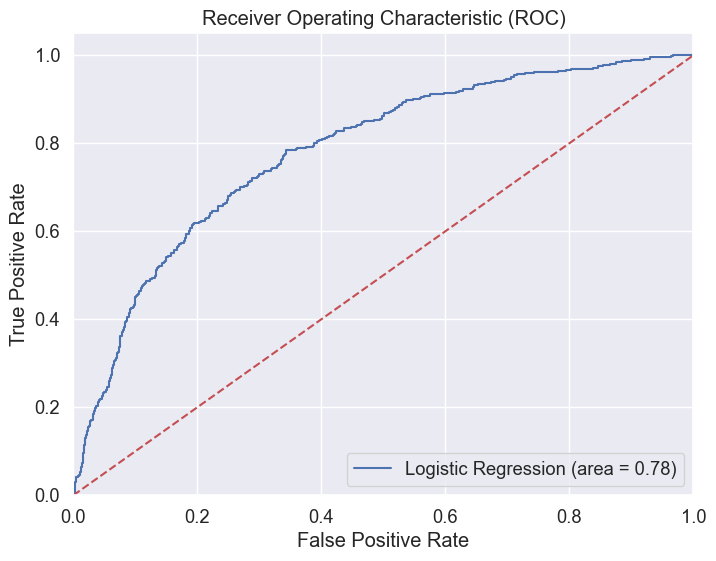

In [57]:
#Predicting probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Generating ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [58]:
X = test.drop('Exited',axis=1)
y = test['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)



# Applying under-sampling
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

# Scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating and fitting the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Output the classification report and confusion matrix
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1264
           1       0.72      0.38      0.50       736

    accuracy                           0.72      2000
   macro avg       0.72      0.65      0.65      2000
weighted avg       0.72      0.72      0.69      2000

[[1152  112]
 [ 455  281]]


# Pipeline with HyperParameter Tuning

In [76]:

X = test.drop('Exited', axis=1)
y = test['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

resamplers = [
    ('SMOTE', SMOTE()),
    ('Oversampling', RandomOverSampler()),
    ('Undersampling', RandomUnderSampler())
]

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB())
]

scalers = [
    ('StandardScaler', StandardScaler())
]

# Define parameter grids for Logistic Regression and Random Forest
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {}  # Naive Bayes does not have hyperparameters to tune in this context
}

# Initialize an empty DataFrame for the results with Precision Score column
results_df = pd.DataFrame(columns=['Resampler', 'Scaler', 'Classifier', 'Best Params', 'F1-Score Macro', 'Accuracy Score', 'AUC Score', 'Precision Score','Recall Score'])

for resampler_name, resampler in resamplers:
    for scaler_name, scaler in scalers:
        for classifier_name, classifier in classifiers:
            if classifier_name == 'Naive Bayes':
                pipeline = ImbPipeline([
                    ('resampler', resampler),
                    ('scaler', scaler),
                    ('classifier', classifier)
                ])
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                best_params = 'N/A'
            else:
                grid_search = GridSearchCV(
                    estimator=classifier,
                    param_grid=param_grids[classifier_name],
                    scoring='accuracy',
                    cv=5
                )
                pipeline = ImbPipeline([
                    ('resampler', resampler),
                    ('scaler', scaler),
                    ('classifier', grid_search)
                ])
                pipeline.fit(X_train, y_train)
                best_params = pipeline.named_steps['classifier'].best_params_
                y_pred = pipeline.predict(X_test)

            f1_macro = f1_score(y_test, y_pred, average='macro')
            accuracy = accuracy_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            b_accuracy = balanced_accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')  


            # Create a temporary DataFrame with the current results including precision
            temp_df = pd.DataFrame([{
                'Resampler': resampler_name,
                'Scaler': scaler_name,
                'Classifier': classifier_name,
                'Best Params': best_params,
                'F1-Score Macro': f1_macro,
                'Accuracy Score': accuracy,
                'AUC Score': roc_auc,
                'Precision Score': precision,
                'Recall Score': recall
            }])

            results_df = pd.concat([results_df, temp_df], ignore_index=True)



In [78]:
results_df.sort_values(by="Accuracy Score",ascending=False)

,Resampler,Scaler,Classifier,Best Params,F1-Score Macro,Accuracy Score,AUC Score,Precision Score,Recall Score
4,Oversampling,StandardScaler,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.765851,0.8660,0.742651,0.801311,0.742651
1,SMOTE,StandardScaler,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.755433,0.8610,0.731851,0.792763,0.731851
0,SMOTE,StandardScaler,Logistic Regression,"{'C': 1, 'solver': 'lbfgs'}",0.622761,0.8140,0.604569,0.698611,0.604569
2,SMOTE,StandardScaler,Naive Bayes,N/A,0.657239,0.8005,0.646147,0.674345,0.646147
7,Undersampling,StandardScaler,Random Forest,"{'max_depth': None, 'min_samples_split': 10, '...",0.732374,0.7965,0.790710,0.713086,0.790710
8,Undersampling,StandardScaler,Naive Bayes,N/A,0.656266,0.7290,0.712183,0.648559,0.712183
5,Oversampling,StandardScaler,Naive Bayes,N/A,0.655799,0.7280,0.712522,0.648387,0.712522
3,Oversampling,StandardScaler,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.651249,0.7200,0.713311,0.646266,0.713311
6,Undersampling,StandardScaler,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.648913,0.7155,0.714355,0.645518,0.714355


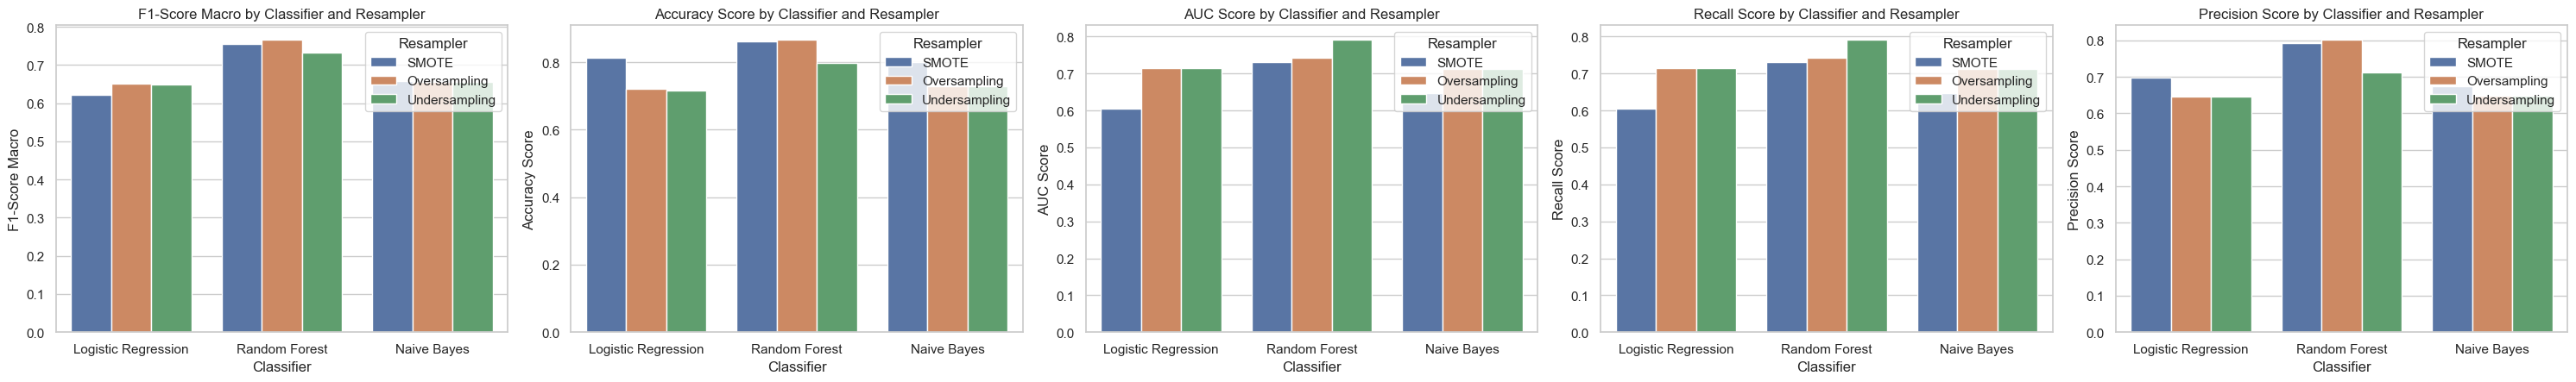

In [79]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure for 5 subplots (1 row, 5 columns) to include Recall and Precision
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))  # Adjusted figsize for additional plots

# Plot F1-Score
sns.barplot(x="Classifier", y="F1-Score Macro", hue="Resampler", data=results_df, ax=axes[0])
axes[0].set_title('F1-Score Macro by Classifier and Resampler')
axes[0].set_ylabel('F1-Score Macro')
axes[0].set_xlabel('Classifier')

# Plot Accuracy Score
sns.barplot(x="Classifier", y="Accuracy Score", hue="Resampler", data=results_df, ax=axes[1])
axes[1].set_title('Accuracy Score by Classifier and Resampler')
axes[1].set_ylabel('Accuracy Score')
axes[1].set_xlabel('Classifier')

# Plot AUC Score
sns.barplot(x="Classifier", y="AUC Score", hue="Resampler", data=results_df, ax=axes[2])
axes[2].set_title('AUC Score by Classifier and Resampler')
axes[2].set_ylabel('AUC Score')
axes[2].set_xlabel('Classifier')

# Plot Recall Score
sns.barplot(x="Classifier", y="Recall Score", hue="Resampler", data=results_df, ax=axes[3])
axes[3].set_title('Recall Score by Classifier and Resampler')
axes[3].set_ylabel('Recall Score')
axes[3].set_xlabel('Classifier')

# Plot Precision Score
sns.barplot(x="Classifier", y="Precision Score", hue="Resampler", data=results_df, ax=axes[4])
axes[4].set_title('Precision Score by Classifier and Resampler')
axes[4].set_ylabel('Precision Score')
axes[4].set_xlabel('Classifier')

# Tight layout to use space efficiently
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()
